In [1]:
from ising import *
import matplotlib.pyplot as plt
import numpy as np
from acf import calculate_acf

In [2]:
J = 1
size = 1000
n_steps = 100000
params = {'beta': np.linspace(0.5, 5, 10), 'estimate': np.empty(10), 'exact' : np.empty(10), 'tau' : np.empty(10)}

In [3]:
for i, beta in enumerate(params['beta']):
    configuration = np.random.choice([-1, 1], size)
    params['estimate'][i], _ = monte_carlo(n_steps=n_steps, beta=beta, J=J, h=0, configuration=configuration)
    params['exact'][i] = energy(beta, J, N= size)

In [4]:
SE = (params['estimate'] -  params['exact']).std()/np.sqrt(10)

In [5]:
np.abs(SE*100/params['estimate'].mean())

0.81766251607384

In [6]:
for i, beta in enumerate(params['beta']):
    corrs = np.array([calculate_acf(size, n_steps, beta, J) for _ in range(250)])
    corr = corrs.mean(axis=0)
    tau = 1/2
    for c in corr:
        tau += c
        if i >= 6 * tau:
            break
        else:
            continue
    params['tau'][i] = tau
    

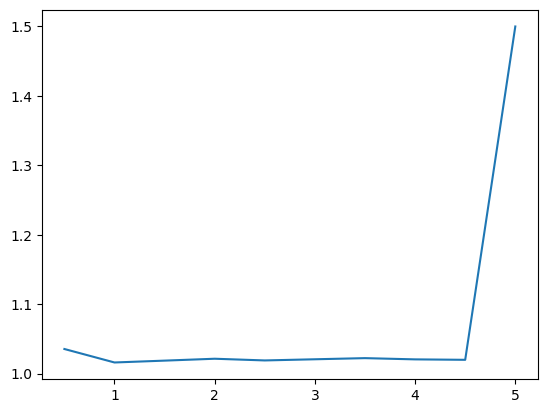

In [7]:
plt.plot(params['beta'], params['tau'])